## Load in and clean data


* Initialize R libraries
* Load data
* Clean data

In [ ]:
# initial checking 
getwd()
list.files("/kaggle/input")
list.files("/kaggle")

[1] "/kaggle/working"

[1] "flavors_of_cacao.csv"

[1] "input"              "kaggle_bigquery.R"  "kaggle_secrets.R"  
[4] "lib"                "template_conf.json" "working"

In [ ]:
# Call the "tidyverse" library using the library() function
library(tidyverse)

# read in the dataset as a data_frame and save it as a variable named "chocolateData"
chocolateData <- read_csv("../input/flavors_of_cacao.csv")

# remove the first line of the dataset using a negative index
chocolateData <- chocolateData[-1,]

# remove the white spaces in the column names
names(chocolateData) <- gsub("[[:space:]+]", "_", names(chocolateData))

# remove percentage signs in the Cocoa_Percent 
chocolateData$Cocoa_Percent <- sapply(chocolateData$Cocoa_Percent, function(x) gsub("%", "", x))

# automatically try to guess the data type of each column using type_convert
chocolateData <- type_convert(chocolateData)                                      
    
# check the first few lines of the data_frame to make sure everything looks alright.
head(chocolateData)
                                      
str(chocolateData)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 1795 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Company 
(Maker-if known), Specific Bean Origin
or Bar Name, Cocoa
...
dbl (3): REF, Review
Date, Rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

── Column specification ────────────────────────────────────────────────────────
cols(
 

Company _(Maker-if_known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
A. Morin,Akata,1680,2015,70,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70,France,2.75,Criollo,Venezuela
A. Morin,Cuba,1315,2014,70,France,3.50,,Cuba


tibble [1,794 × 9] (S3: tbl_df/tbl/data.frame)
 $ Company _(Maker-if_known)       : chr [1:1794] "A. Morin" "A. Morin" "A. Morin" "A. Morin" ...
 $ Specific_Bean_Origin_or_Bar_Name: chr [1:1794] "Kpime" "Atsane" "Akata" "Quilla" ...
 $ REF                             : num [1:1794] 1676 1676 1680 1704 1315 ...
 $ Review_Date                     : num [1:1794] 2015 2015 2015 2015 2014 ...
 $ Cocoa_Percent                   : num [1:1794] 70 70 70 70 70 70 70 70 70 70 ...
 $ Company_Location                : chr [1:1794] "France" "France" "France" "France" ...
 $ Rating                          : num [1:1794] 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 2.75 ...
 $ Bean_Type                       : chr [1:1794] " " " " " " " " ...
 $ Broad_Bean_Origin               : chr [1:1794] "Togo" "Togo" "Togo" "Peru" ...


## Graph data with ggplot2

Plots in ggplot2. Takes two arguments.
1. The dataset that will be plotted. 
2. A function, aes(), short for aesthetic. This function itself takes multiple arguments. Let's start by using x & y, which will tell the function which columns of the data_frame to plot on the x axis and y axis.

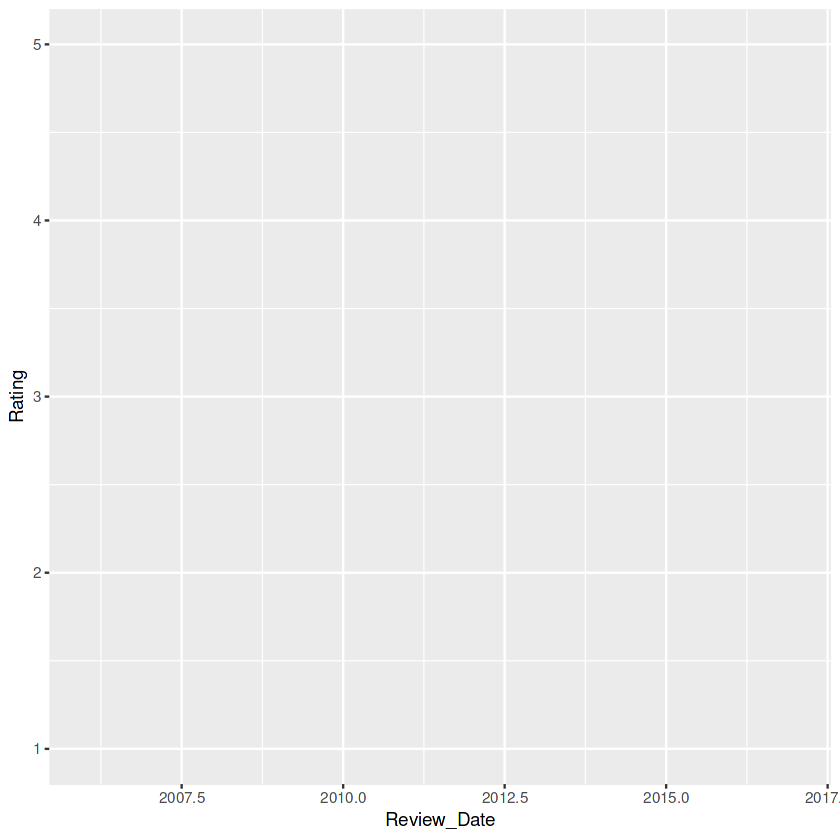

In [4]:
# draw a blank plot with "Review_Date" as the x axis and "Rating" as the y axis.
ggplot(chocolateData, aes(x= Review_Date, y = Rating))

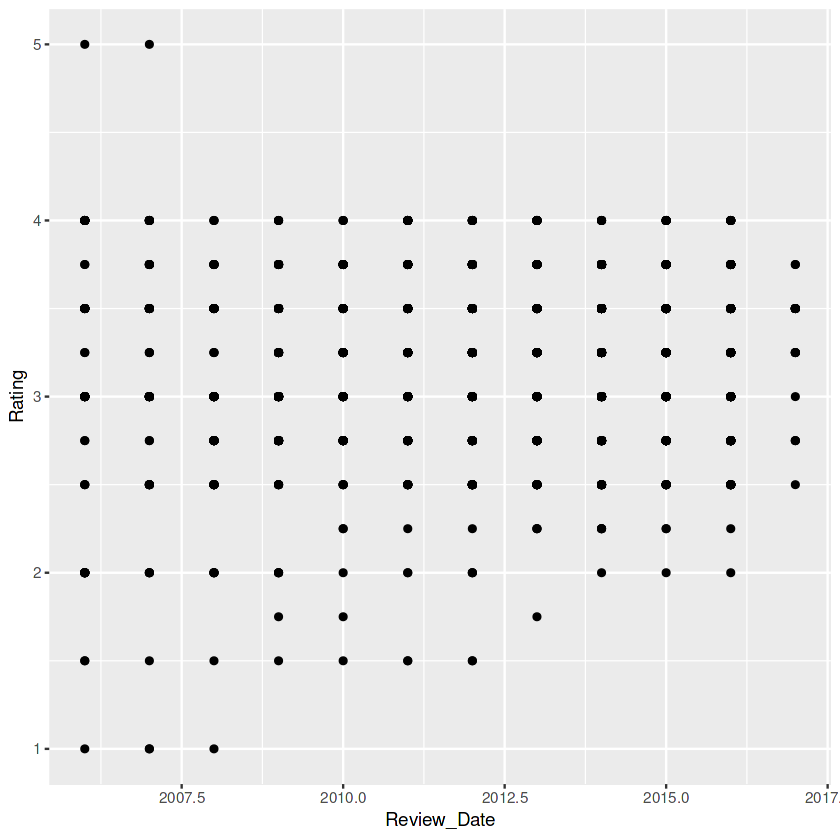

In [5]:
# draw a plot with "Review_Date" as the x axis and "Rating" as the y axis, and add a point for each data point
ggplot(chocolateData, aes(x= Review_Date, y = Rating)) + geom_point()

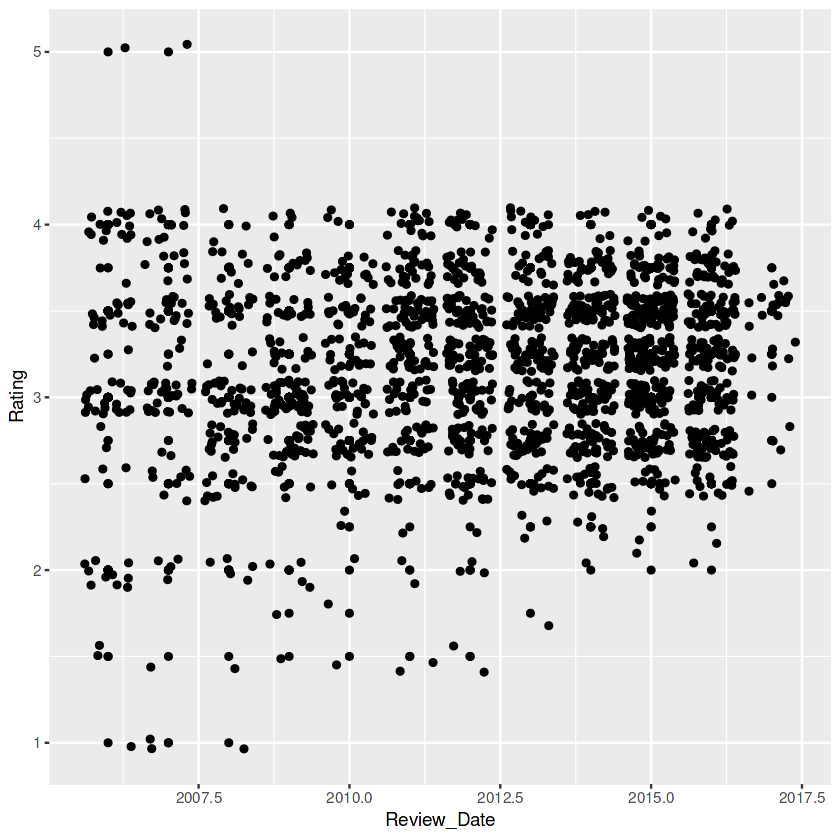

In [6]:
# draw a plot with "Review_Date" as the x axis and "Rating" as the y axis, add a point for each data point & move each point slightly so they don't overlap
ggplot(chocolateData, aes(x= Review_Date, y = Rating)) + geom_point() + geom_jitter()

`geom_smooth()` using formula = 'y ~ x'


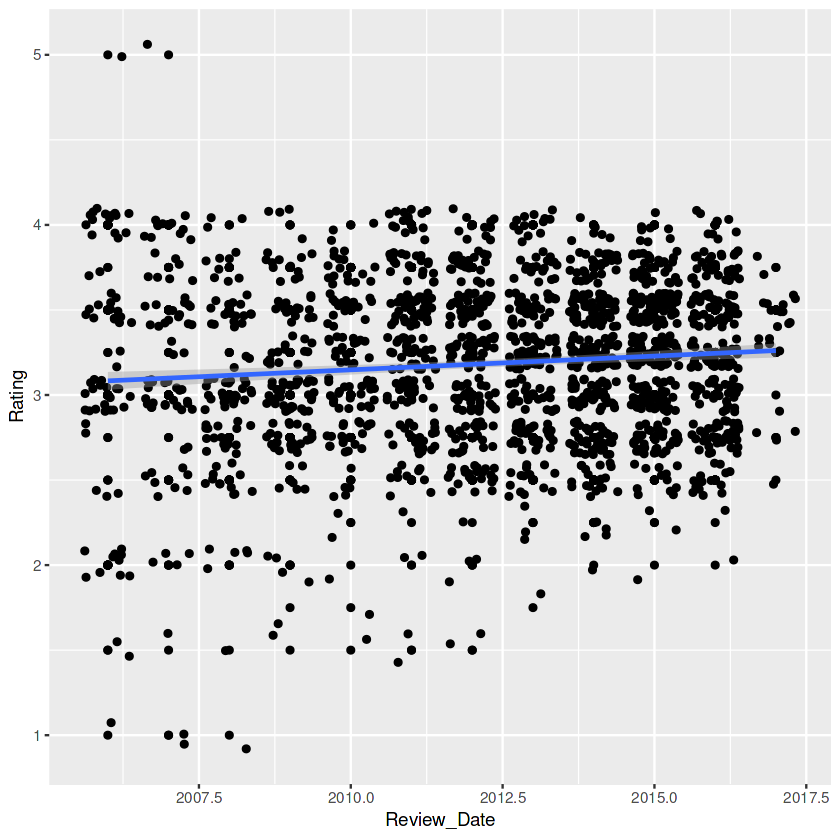

In [7]:
# draw a plot with "Review_Date" as the x axis and "Rating" as the y axis, add a point for each data point, 
# move each point slightly so they don't overlap and add a smoothed line (lm = linear model)
ggplot(chocolateData, aes(x= Review_Date, y = Rating)) + 
    geom_point() + 
    geom_jitter() +
    geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


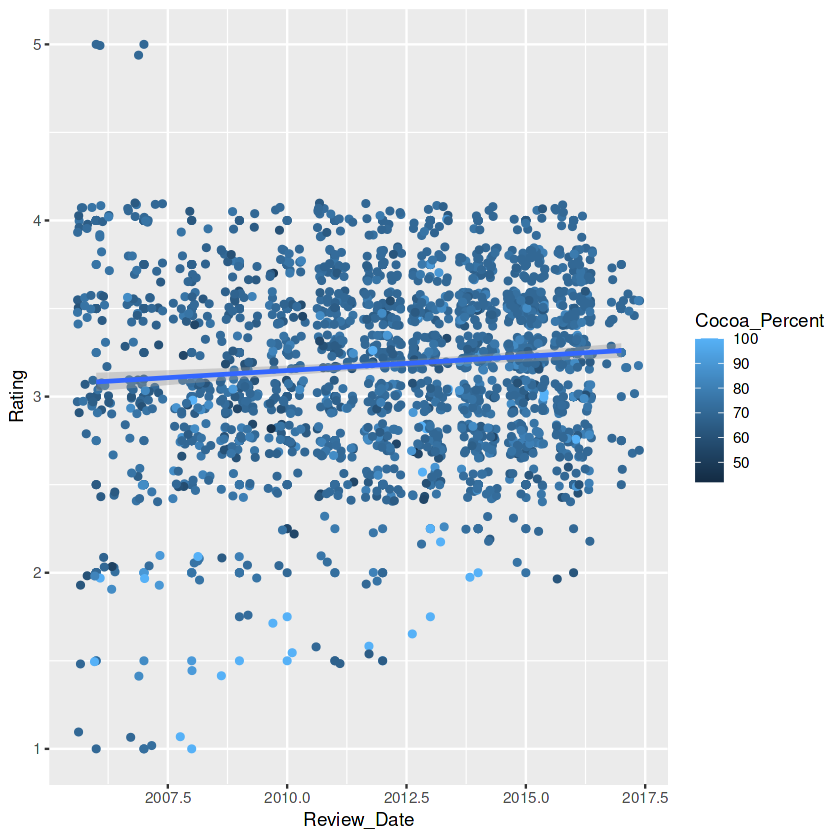

In [8]:
# draw a plot with "Review_Date" as the x axis and "Rating" as the y axis, add a point for each data point, 
# move each point slightly so they don't overlap and add a smoothed line (lm = linear model). Encode Cocoa_Percent as color.
ggplot(chocolateData, aes(x= Review_Date, y = Rating, color = Cocoa_Percent)) + 
    geom_point() + 
    geom_jitter() +
    geom_smooth(method = 'lm')

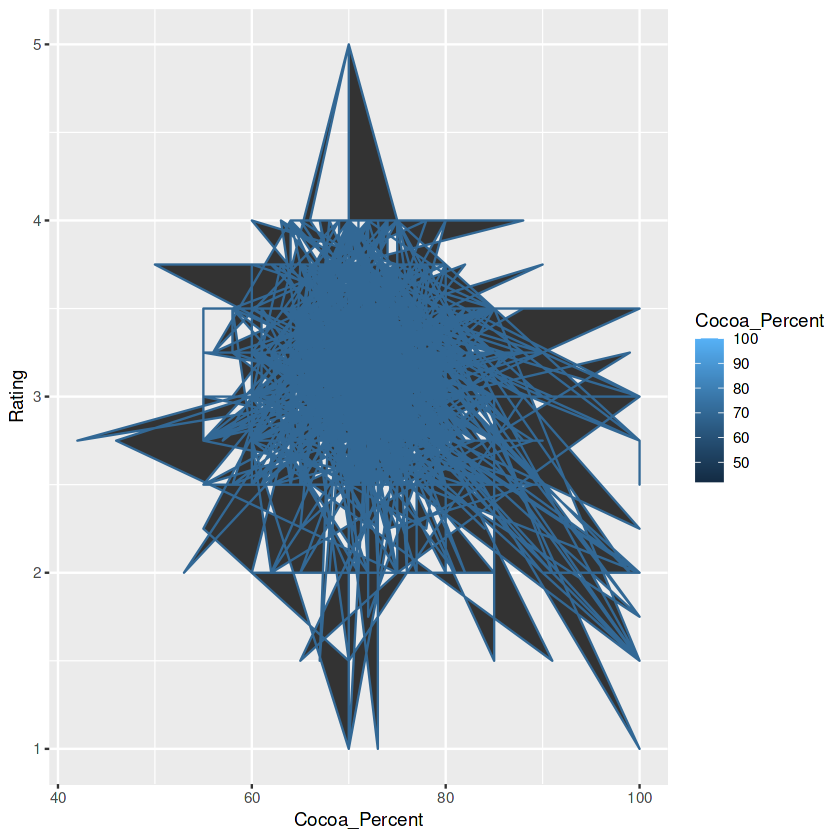

In [ ]:
# Plot the relationship between cocoa percentage and ratings, using whichever geom (or multiple geoms).
# Note that, if geom_smooth() used, a linear model may not be the best fit for the data!

ggplot(chocolateData, aes(x= Cocoa_Percent, y = Rating, color = Cocoa_Percent)) + 
    # geom_point() + 
    # geom_jitter() +
    # geom_smooth(method = 'lm')
    geom_polygon()
    # geom_tile()
    # geom_bin_2d()    

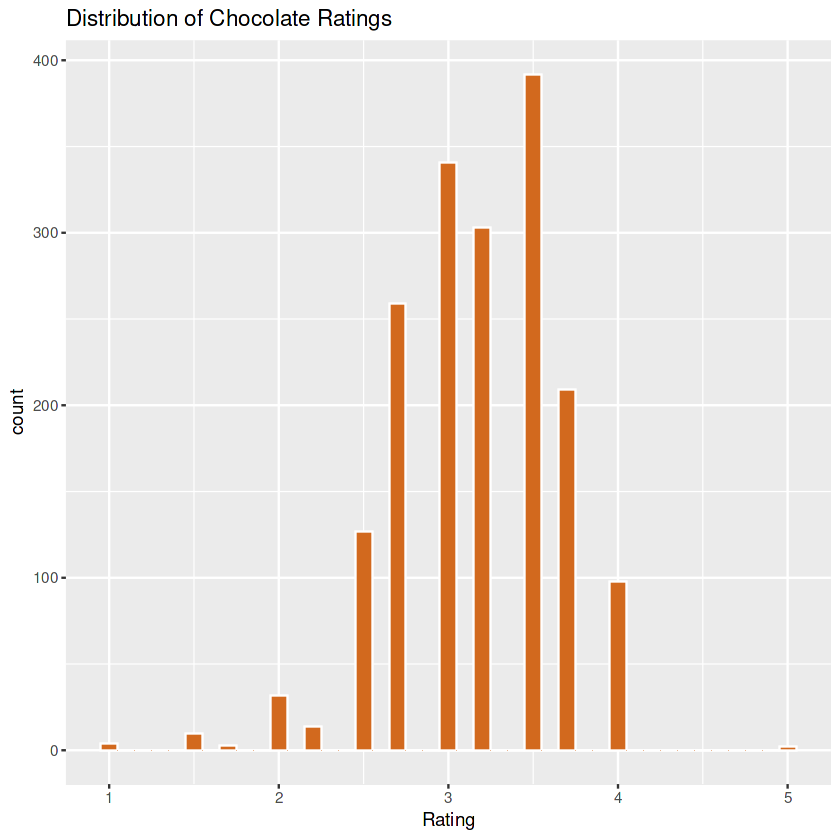

In [45]:
#  Distribution of Rating
ggplot(chocolateData, aes(x = Rating)) +
  geom_histogram(binwidth = 0.1, fill = "chocolate", color = "white") +
  labs(title = "Distribution of Chocolate Ratings")

`geom_smooth()` using formula = 'y ~ x'


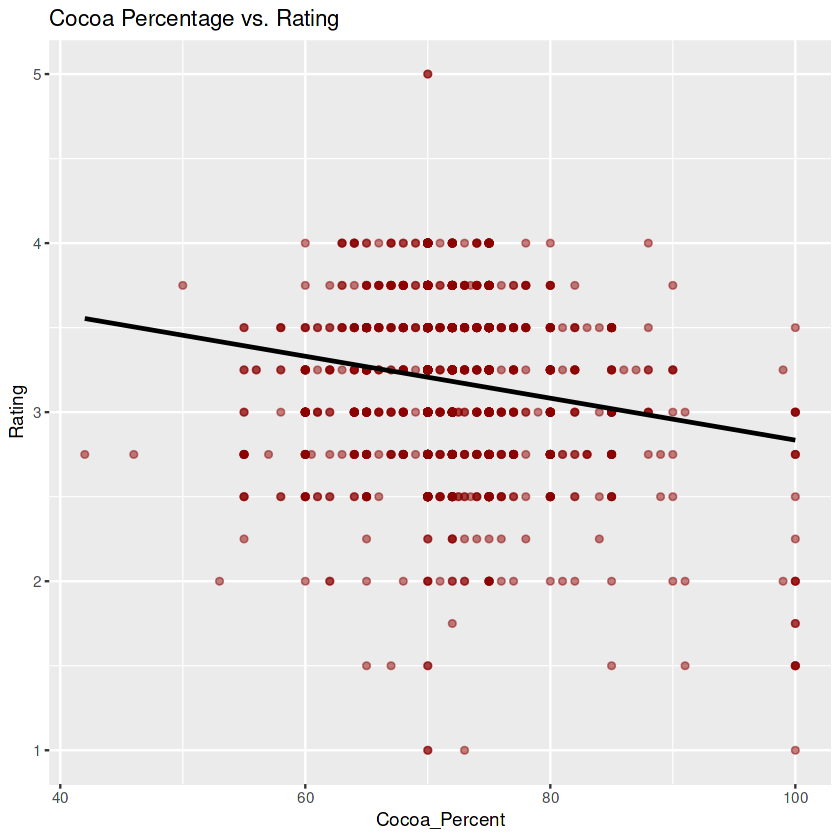

In [46]:
# Relationship Between Cocoa % and Rating
ggplot(chocolateData, aes(x = Cocoa_Percent, y = Rating)) +
  geom_point(alpha = 0.5, color = "darkred") +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(title = "Cocoa Percentage vs. Rating")

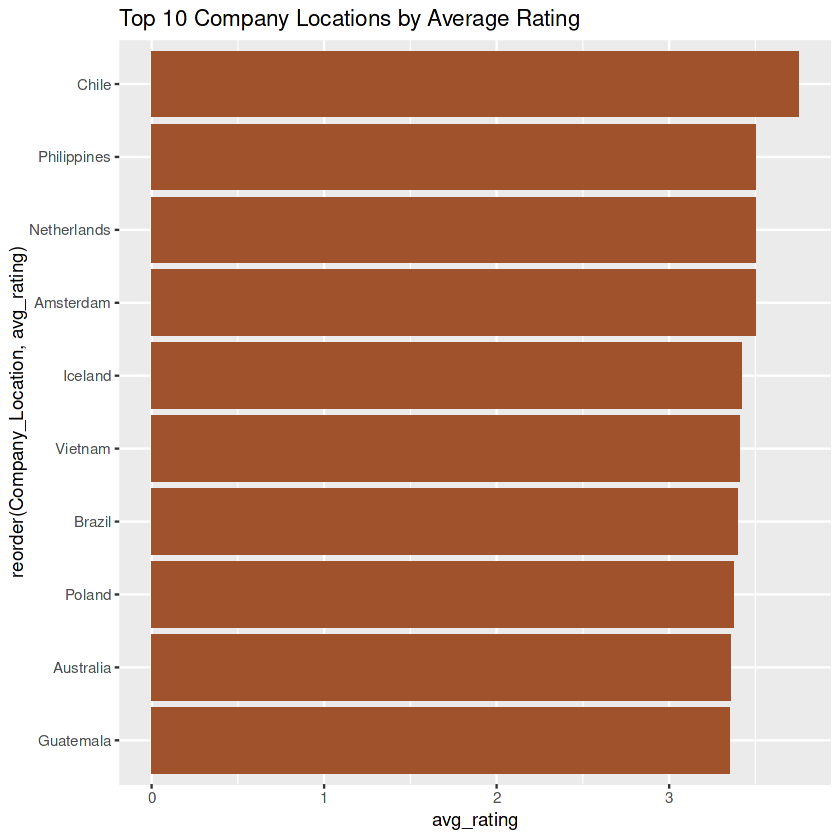

In [47]:
# Average Rating by Company Location
chocolateData %>%
  group_by(Company_Location) %>%
  summarise(avg_rating = mean(Rating, na.rm = TRUE)) %>%
  arrange(desc(avg_rating)) %>%
  top_n(10, avg_rating) %>%
  ggplot(aes(x = reorder(Company_Location, avg_rating), y = avg_rating)) +
  geom_col(fill = "sienna") +
  coord_flip() +
  labs(title = "Top 10 Company Locations by Average Rating")

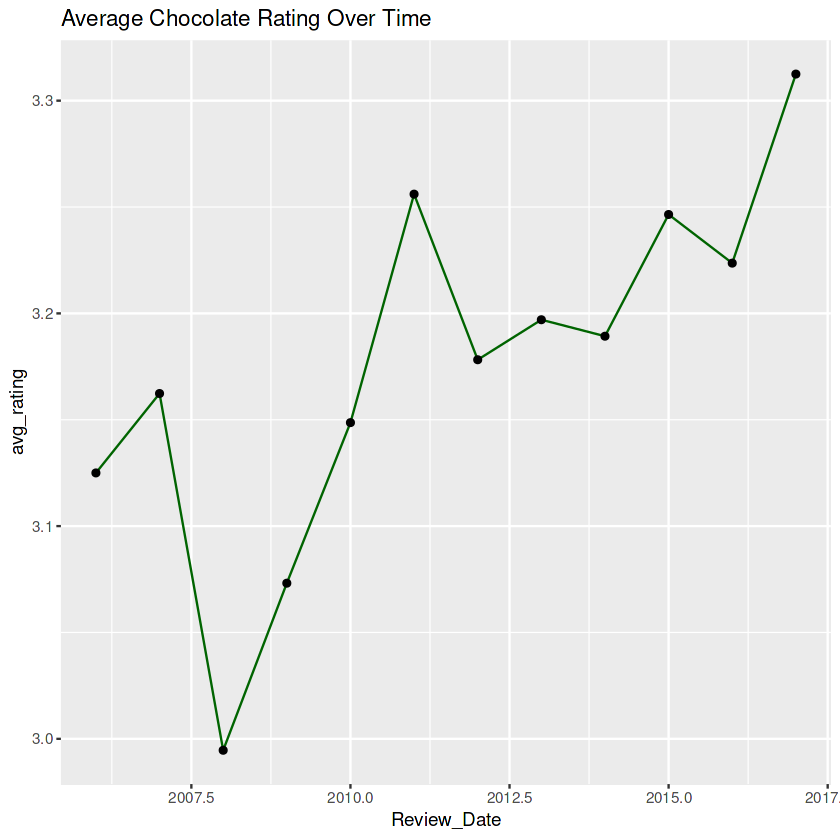

In [48]:
# Rating Trends Over Time
chocolateData %>%
  group_by(Review_Date) %>%
  summarise(avg_rating = mean(Rating, na.rm = TRUE)) %>%
  ggplot(aes(x = Review_Date, y = avg_rating)) +
  geom_line(color = "darkgreen") +
  geom_point() +
  labs(title = "Average Chocolate Rating Over Time")

## Save graphs

In [ ]:
# save plot to a variable with an informative name
chocolateRatingByReviewDate <- ggplot(chocolateData, aes(x= Review_Date, y = Rating, color = Cocoa_Percent)) + 
    geom_point() + 
    geom_jitter() +
    geom_smooth(method = 'lm')

# save plot
ggsave("chocolateRatingByReviewDate.png", # the name of the file where it will be save
       plot = chocolateRatingByReviewDate, # what plot to save
       height=6, width=10, units="in") # the size of the plot & units of the size

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


In [ ]:
# Save the plot made showing the relationship between cocoa percentage and to this kernel's output. 

chocolateDistributionRating <- ggplot(chocolateData, aes(x = Rating)) +
  geom_histogram(binwidth = 0.1, fill = "chocolate", color = "white") +
  labs(title = "Distribution of Chocolate Ratings")

ggsave("chocolateDistributionRating.png", # the name of the file where it will be save
       plot = chocolateDistributionRating, # what plot to save
       height=6, width=10, units="in") # the size of the plot & units of the size

## Summary graphs

Pipes : (%>%)

In [53]:
# Return the average and sd of ratings by the year a rating was given
chocolateData %>%
    group_by(Review_Date) %>%
    summarise(averageRating = mean(Rating),
             sdRating = sd(Rating))

Review_Date,averageRating,sdRating
<dbl>,<dbl>,<dbl>
2006,3.125000,0.7691224
2007,3.162338,0.6998193
2008,2.994624,0.5442118
2009,3.073171,0.4591195
2010,3.148649,0.4663426
2011,3.256061,0.4899536
2012,3.178205,0.4835962
2013,3.197011,0.4461178
2014,3.189271,0.4148615


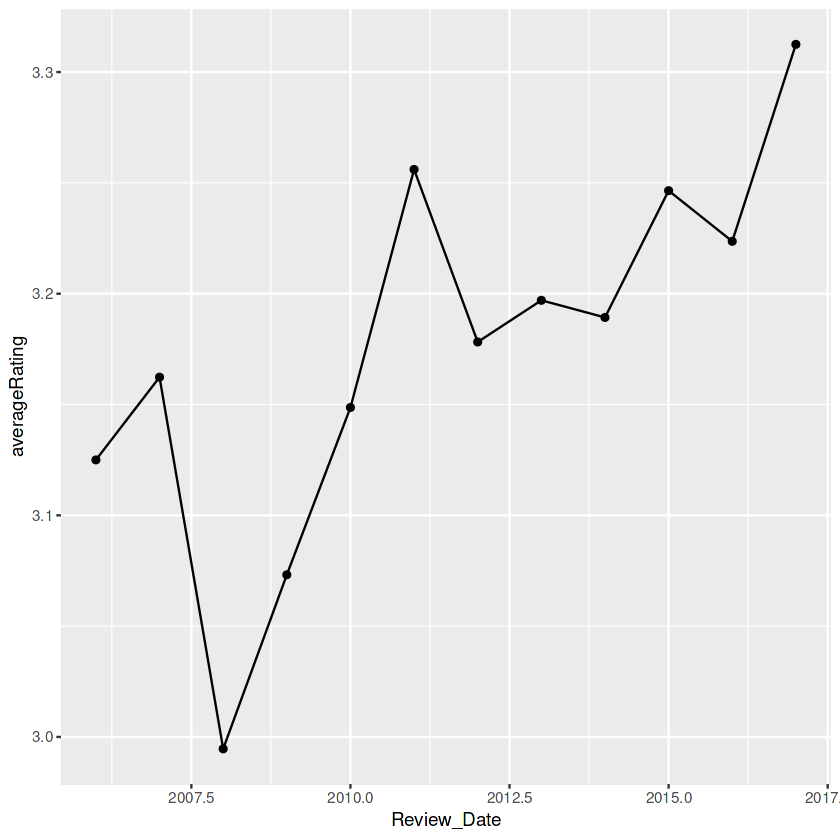

In [54]:
# Return the average and sd of ratings by the year a rating was given
averageRatingByYear <- chocolateData %>%
    group_by(Review_Date) %>%
    summarise(averageRating = mean(Rating))

# plot only the average rating by year
ggplot(averageRatingByYear, aes(y= averageRating, x = Review_Date )) + 
    geom_point() + # plot individual points
    geom_line() # plot line

In [57]:
# Make & save a data_frame with the average and sd Cocoa_Percent by the year the reviews were written
chocolateData %>%
    group_by(Review_Date) %>%
    summarise(averageCocoa_Percent = mean(Cocoa_Percent),
             sdCocoa_Percent = sd(Cocoa_Percent))

averageRatingByYear <- chocolateData %>%
    group_by(Review_Date) %>%
    summarise(averageCocoa_Percent = mean(Cocoa_Percent),
             sdCocoa_Percent = sd(Cocoa_Percent))

Review_Date,averageCocoa_Percent,sdCocoa_Percent
<dbl>,<dbl>,<dbl>
2006,71.00000,7.424740
2007,72.03896,6.951792
2008,72.69892,8.412962
2009,70.44309,6.895057
2010,70.77928,7.424678
2011,70.96970,5.377714
2012,71.52821,5.725056
2013,72.26630,8.325992
2014,72.25304,5.201014


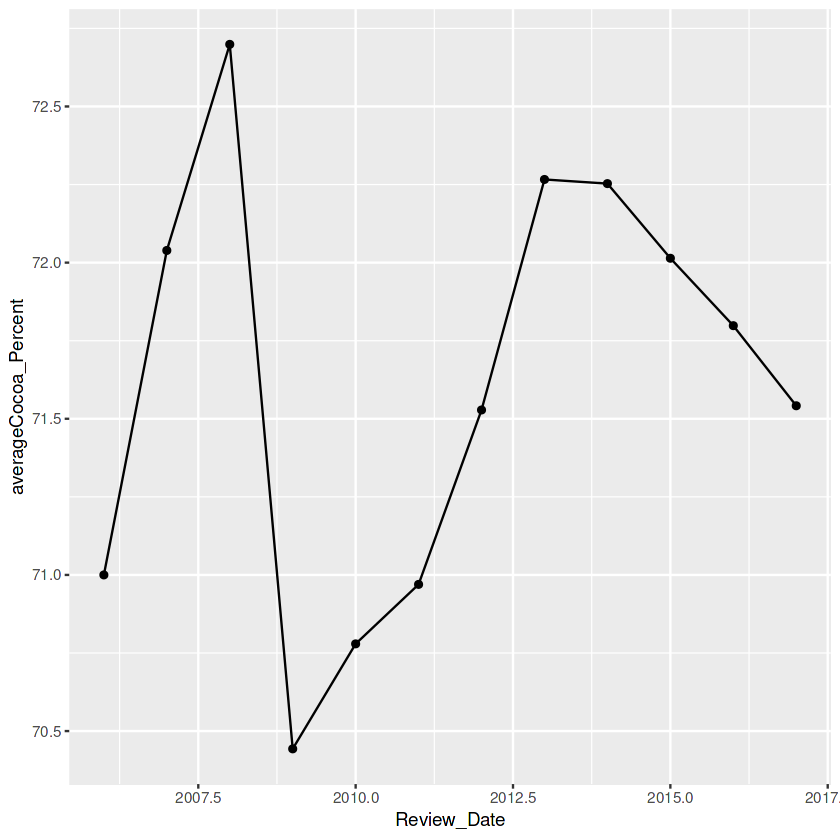

In [59]:
# Return the average and sd of ratings by the year a rating was given
averageRatingByYear <- chocolateData %>%
    group_by(Review_Date) %>%
    summarise(averageCocoa_Percent = mean(Cocoa_Percent))

# plot only the average rating by year
ggplot(averageRatingByYear, aes(y= averageCocoa_Percent, x = Review_Date )) + 
    geom_point() + # plot individual points
    geom_line() # plot line

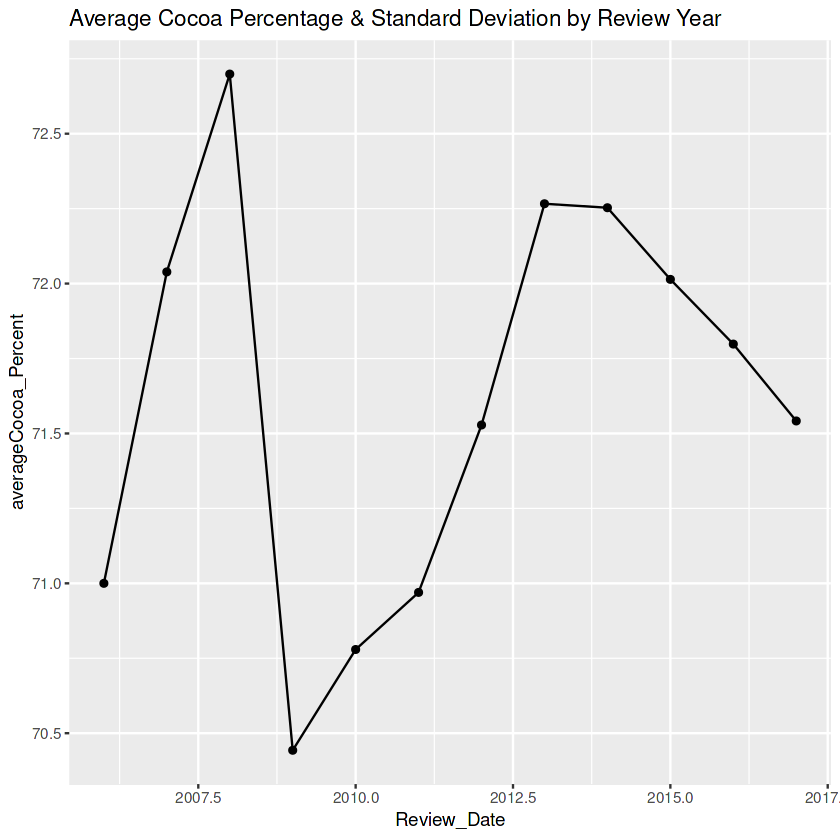

In [ ]:
# Make & save a data_frame with the average and sd Cocoa_Percent by the year the reviews were written
# chocolateData %>%
#     group_by(Review_Date) %>%
#     summarise(averageCocoa_Percent = mean(Cocoa_Percent),
#              sdCocoa_Percent = sd(Cocoa_Percent))

# Return the average and sd of ratings by the year a rating was given
averageRatingByYear <- chocolateData %>%
    group_by(Review_Date) %>%
    summarise(averageCocoa_Percent = mean(Cocoa_Percent))

# plot only the average rating by year
ggplot(averageRatingByYear, aes(y= averageCocoa_Percent, x = Review_Date )) + 
    geom_point() + # plot individual points
    geom_line() + # plot line
    labs(title = "Average Cocoa Percentage & Standard Deviation by Review Year")

# Save plot to the output
averageRatingByYearPlot <- ggplot(averageRatingByYear, aes(y= averageCocoa_Percent, x = Review_Date )) + 
    geom_point() + # plot individual points
    geom_line() # plot line

ggsave("averageRatingSDByYear.png", # the name of the file where it will be save
       plot = averageRatingByYearPlot, # what plot to save
       height=6, width=10, units="in") # the size of the plot & units of the size

# Add a title to plot. Alternatively use function like ggtitle()